In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
p = Path('../data/data/')

In [4]:
fnames = [str(i) for i in p.iterdir()]

In [5]:
import cv2

In [6]:
def imread(fname):
    im = cv2.imread(str(fname))
    # openCV by default uses BGR ordering but we need RBG usually
    # height x width x channels
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [7]:
df = pd.DataFrame(columns=['fname', 'img'])

In [8]:
df.fname = fnames

In [9]:
df['img'] = df.fname.apply(lambda x: imread(x).shape)

In [10]:
df.img.value_counts()

(274, 224, 3)     11978
(743, 495, 3)      8614
(489, 400, 3)      5740
(671, 480, 3)      3784
(1152, 768, 3)     2666
(576, 384, 3)       301
(672, 480, 3)        59
(336, 224, 3)        21
(224, 224, 3)        12
(299, 224, 3)        10
(273, 224, 3)         9
(670, 480, 3)         3
(668, 480, 3)         3
(280, 224, 3)         3
(667, 480, 3)         3
(306, 224, 3)         2
(235, 224, 3)         2
(669, 480, 3)         2
(285, 224, 3)         1
(673, 480, 3)         1
(186, 224, 3)         1
(666, 480, 3)         1
(272, 224, 3)         1
(267, 224, 3)         1
(281, 224, 3)         1
(286, 224, 3)         1
Name: img, dtype: int64

In [11]:
df['position'] = df.img.apply(lambda x: x[0] >= x[1])

In [12]:
df.position.value_counts()

True     33219
False        1
Name: position, dtype: int64

In [13]:
df[df.position == False]['fname']

13080    ../data/data/16195.jpg
Name: fname, dtype: object

In [14]:
import matplotlib.pyplot as plt

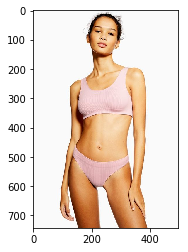

In [15]:
plt.imshow(imread(df.fname[26512]))

In [16]:
im = imread(df.fname[26512])

In [17]:
im.shape

(743, 495, 3)

In [18]:
WHITE = [255,255,255]

In [19]:
im.shape[0] > im.shape[1]

True

In [20]:
max(im.shape[0], im.shape[1])

743

In [21]:
diff = abs(im.shape[0] - im.shape[1])
diff

248

In [22]:
# top, bottom, left, right
imb = cv2.copyMakeBorder(im, 0, 0, int(diff/2), int(diff/2), cv2.BORDER_CONSTANT,value=WHITE)

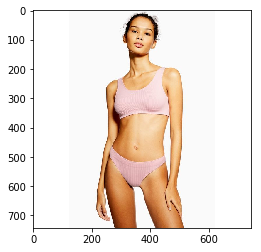

In [23]:
plt.imshow(imb)

In [24]:
def im_squared(im, col=[255, 255, 255]):
    v, h = im.shape[0], im.shape[1]
    diff = abs(h - v)
    pad = int(diff/2)
    if v > h:
        return cv2.copyMakeBorder(im, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=col)
    else:
        return cv2.copyMakeBorder(im, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=col)

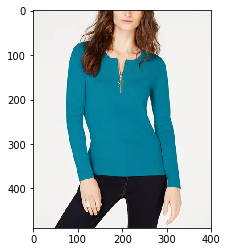

In [25]:
plt.imshow(imread(df.fname[1000]))

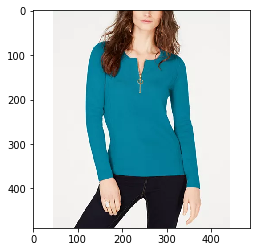

In [26]:
plt.imshow(im_squared(imread(df.fname[1000])))

In [27]:
imread(df.fname[13080]).shape

(186, 224, 3)

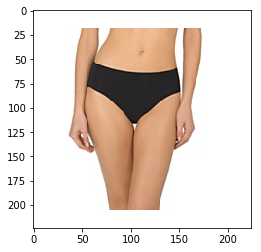

In [28]:
plt.imshow(im_squared(imread(df.fname[13080])))

In [29]:
im_squared(imread(df.fname[13080])).shape

(224, 224, 3)

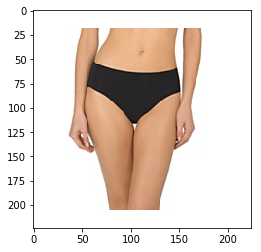

In [30]:
plt.imshow(im_squared(imread(df.fname[13080])))

In [31]:
def imsave(im, fname):
    cv2.imwrite(fname, cv2.cvtColor(im, cv2.COLOR_RGB2BGR))

In [32]:
def resize(im, new_height=None, new_width=None, scale=0.5):
    """resizes images"""
    r, c, _ = im.shape

    if new_height is None and new_width is None and scale is not None:
        # keeping the same aspect ratio as original
        new_height = int(scale * r)
        new_width = int(scale * c)
    elif new_height is None and new_width is not None:
        # use the scale based on old and new width
        scale = float(new_width) / float(c)
        new_height = int(scale * r)
    elif new_height is not None and new_width is None:
        # use the scale based on old and new height
        scale = float(new_height) / float(r)
        new_width = int(scale * c)
    elif new_height is not None and new_width is not None:
        # just use the new height and old height
        pass
    else:
        raise InvalidInputException('Invalid input configuration')

    imr = cv2.resize(im, (new_width, new_height))
    return imr

In [33]:
sz = 512

In [34]:
from fastprogress import progress_bar
from concurrent.futures import ProcessPoolExecutor, as_completed

In [35]:
def parallel(func, job_list, n_jobs=16):
    with ProcessPoolExecutor(max_workers=n_jobs) as pool:
        futures = [pool.submit(func, job) for job in job_list]
        for f in progress_bar(as_completed(futures), total=len(job_list)):
            pass
    return [f.result() for f in futures]

In [38]:
def convert(fname):
    im = imread(fname)
    imb = im_squared(im)
    imr = resize(imb, sz, sz)
    imsave(imr, fname)

In [39]:
convert('/home/gokul/Desktop/31.jpg')

In [40]:
job_list = df.fname.values

In [41]:
result = parallel(convert, job_list)